This tutorial demonstrates runing Molecular Dynamics (MD) simulations on lattice systems.
First, import all the stuff we'll need

In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
from libra_py import units
from libra_py import QE_methods
from libra_py import normal_modes

import py3Dmol   # molecular visualization
import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::v

In [8]:
dt = 1.0*units.fs2au
PT = {"P":31.0 }
#R0, V0, M0, E0 = QE_methods.read_md_data_xyz("pristine/pristine-pos-1.xyz", PT, dt)
R0, E0 = QE_methods.read_md_data_xyz2("pristine/pristine-pos-1.xyz", PT)  # already in Bohrs
V0, E0 = QE_methods.read_md_data_xyz2("pristine/pristine-vel-1.xyz", PT)  # 
F0, E0 = QE_methods.read_md_data_xyz2("pristine/pristine-frc-1.xyz", PT)  # 
V0 = V0 / units.Angst
F0 = F0 / units.Angst
A0 = F0 / PT["P"]
print( V0.num_of_rows, V0.num_of_cols)

#R1, V1, M1, E1 = QE_methods.read_md_data_xyz("divac1/divac1-pos-1.xyz", PT, dt)
R1, E1 = QE_methods.read_md_data_xyz2("divac1/divac1-pos-1.xyz", PT)  # already in Bohrs
V1, E1 = QE_methods.read_md_data_xyz2("divac1/divac1-vel-1.xyz", PT)  # 
F1, E1 = QE_methods.read_md_data_xyz2("divac1/divac1-frc-1.xyz", PT)  # 
V1 = V1 / units.Angst
F1 = F1 / units.Angst
A1 = F1 / PT["P"]
print( V1.num_of_rows, V1.num_of_cols)

M0 = MATRIX(V0.num_of_rows, 1)
for i in range(V0.num_of_rows):
    M0.set(i,0, PT["P"])

M1 = MATRIX(V1.num_of_rows, 1)
for i in range(V1.num_of_rows):
    M1.set(i,0, PT["P"])

192 10001
186 10001


In [9]:
#params = {"cov_flag":0, "visualize":0, "verbosity":1 }
#res0 = normal_modes.compute_cov1( R0, V0, M0, E0, params)
#res1 = normal_modes.compute_cov1( R1, V1, M1, E1, params)

params = {"cov_flag":0, "visualize":0, "verbosity":1 }
res0 = normal_modes.compute_cov( R0, V0, A0, M0, E0, params)
res1 = normal_modes.compute_cov( R1, V1, A1, M1, E1, params)

========= Normal modes calculations according to: =============================
Strachan, A. Normal Modes and Frequencies from Covariances in Molecular Dynamics        or Monte Carlo Simulation. J. Chem. Phys. 2003, 120, 1-4.

Computing covariance matrix of positions

Computing covariance matrix of velocities

Computing covariance matrix of accelerations

Eigenvalue solver for covariance matrix of positions

Eigenvalue solver for covariance matrix of velocities

Eigenvalue solver for covariance matrix of accelerations

Angular frequencies (derived from w_v/w_r)
Angular frequencies (derived from w_a/w_r)
========= Done with the Normal modes calculations =============================
========= Normal modes calculations according to: =============================
Strachan, A. Normal Modes and Frequencies from Covariances in Molecular Dynamics        or Monte Carlo Simulation. J. Chem. Phys. 2003, 120, 1-4.

Computing covariance matrix of positions

Computing covariance matrix of velocitie

In [10]:
ndof = R0.num_of_rows
dat0, dat1 = [], []
print( F"  Mode index   \t   pristine cm^-1   \t   divac1 cm^-1" )
for i in range(ndof):
    dat0.append(res0[1].get(i))    
    dat1.append(res1[1].get(i)) 
    print( F" {i}  \t\t { res0[1].get(i): 5.0f} \t\t { res1[1].get(i): 5.0f} " )

  Mode index   	   pristine cm^-1   	   divac1 cm^-1
 0  		     9 		     0 
 1  		     0 		     7 
 2  		     0 		     0 
 3  		   290 		   322 
 4  		   305 		   334 
 5  		   305 		   334 
 6  		   326 		   342 
 7  		   321 		   331 
 8  		   310 		   334 
 9  		   306 		   339 
 10  		   316 		   349 
 11  		   311 		   345 
 12  		   313 		   332 
 13  		   317 		   328 
 14  		   316 		   335 
 15  		   315 		   322 
 16  		   322 		   330 
 17  		   319 		   317 
 18  		   320 		   325 
 19  		   313 		   327 
 20  		   310 		   329 
 21  		   306 		   328 
 22  		   308 		   318 
 23  		   311 		   313 
 24  		   302 		   310 
 25  		   299 		   316 
 26  		   299 		   318 
 27  		   301 		   305 
 28  		   291 		   308 
 29  		   290 		   308 
 30  		   296 		   311 
 31  		   297 		   290 
 32  		   294 		   295 
 33  		   296 		   287 
 34  		   289 		   293 
 35  		   283 		   295 
 36  		   290 		   288 
 37  		   285 		   277 
 38  		   281 		   269 
 39  		   271 		   26

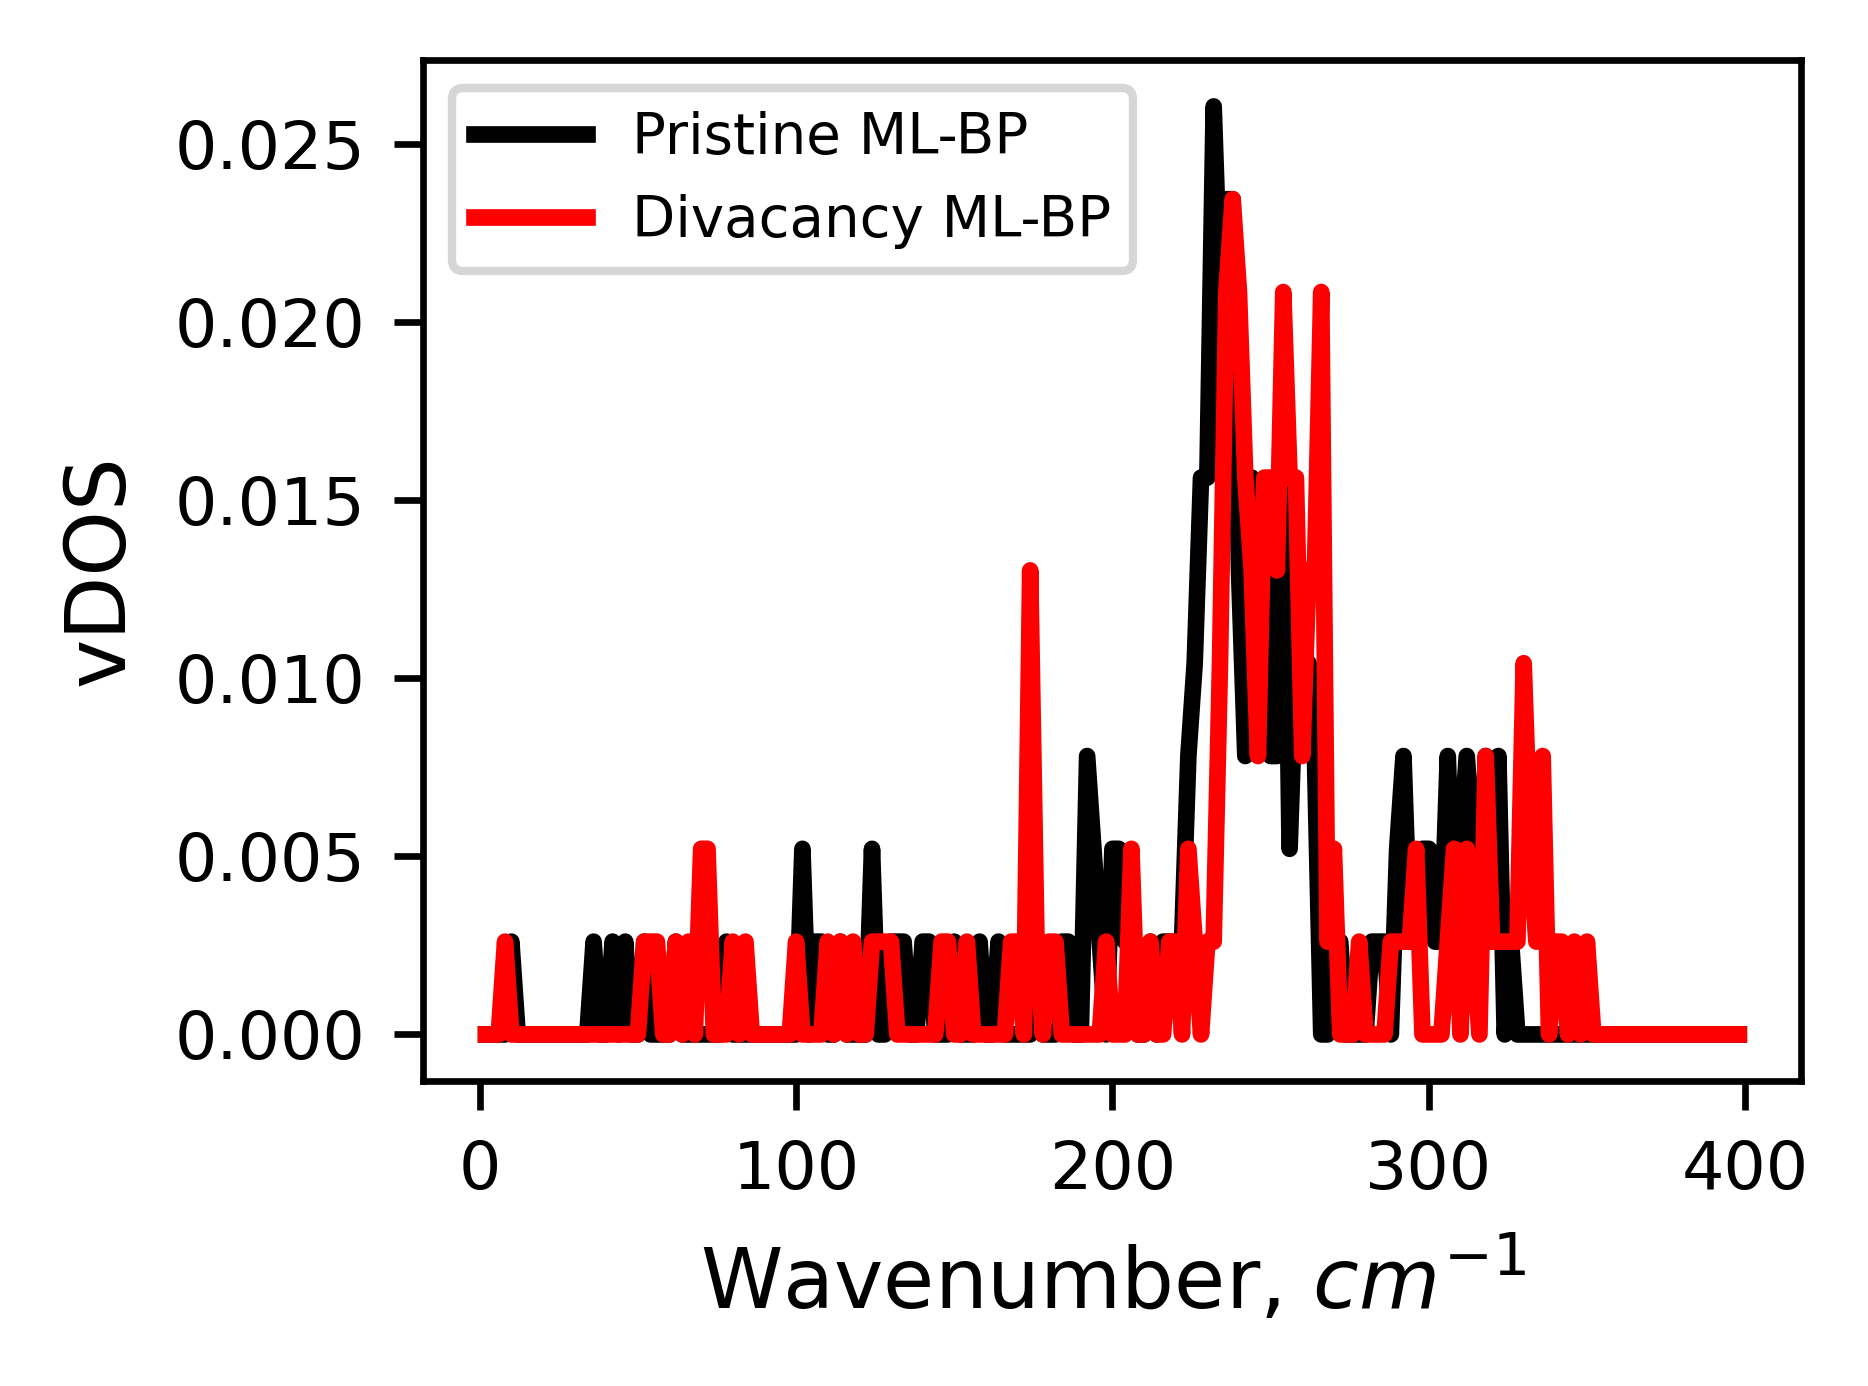

In [12]:
w = []
for i in range(1, 200):
    w.append(2.0*i)

z0 = DATA(dat0)
dens0, cum0 = z0.Calculate_Distribution(w)

z1 = DATA(dat1)
dens1, cum1 = z1.Calculate_Distribution(w)


plt.rc('axes', titlesize=12)      # fontsize of the axes title\n",
plt.rc('axes', labelsize=12)      # fontsize of the x and y labels\n",
plt.rc('legend', fontsize=10)     # legend fontsize\n",
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels\n",
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels\n",
plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)


figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)
plt.subplot(1,1,1)
#plt.title('Divacancy ML-BP', fontsize=10)
plt.xlabel('Wavenumber, $cm^{-1}$', fontsize=10)
plt.ylabel('vDOS', fontsize=10)
#plt.legend()

plt.plot(w, dens0, label='Pristine ML-BP', linewidth=2, color = "black") 
plt.plot(w, dens1, label='Divacancy ML-BP', linewidth=2, color = "red") 

plt.legend(fontsize=6.75, ncol=1, loc='upper left')
plt.tight_layout()
plt.savefig('vDOS.png', dpi=600)
plt.show()
plt.close()